In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('Admission_Predict.csv')

In [10]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
df.drop('Serial No.',axis=1,inplace=True)

In [14]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
y = df['Chance of Admit ']

In [21]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [22]:
X = df.drop('Chance of Admit ',axis=1)

In [23]:
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [24]:
#First will try with using normalization MinMaxScaler

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\saurabhsonawane\Anaconda3\lib\site-pac

In [29]:
X_train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,0.005025,0.64,0.642857,0.5,0.625,0.375,0.599359,1.0
18,0.042714,0.56,0.642857,0.5,0.750,0.500,0.641026,0.0
202,0.505025,1.00,1.000000,1.0,0.875,0.875,0.996795,1.0
250,0.625628,0.60,0.428571,0.5,0.500,0.375,0.567308,1.0
274,0.685930,0.50,0.285714,0.0,0.250,0.375,0.368590,0.0


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lr_predict = lr.predict(X_test)

In [38]:
y_test.head()

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
Name: Chance of Admit , dtype: float64

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,lr_predict)

0.8212241793299224

In [51]:
print(lr.predict(X_test.iloc[[1],:]))
print(y_test.iloc[1])

[0.73430228]
0.68


In [92]:
dframe = pd.read_csv('Admission_Predict.csv')

In [93]:
dframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [94]:
dframe.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [95]:
dframe['SOP'].nunique()

9

In [96]:
def GREBAND(col):
    if col>=290 and col<300:
        return 1
    if col>=300 and col<310:
        return 2
    if col>=310 and col<320:
        return 3
    if col>=320 and col<330:
        return 4
    if col>=330 and col<=340:
        return 5

In [97]:
dframe['GRE_SCORE_BAND'] = dframe['GRE Score'].apply(GREBAND)

In [98]:
dframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_SCORE_BAND
0,1,337,118,4,4.5,4.5,9.65,1,0.92,5
1,2,324,107,4,4.0,4.5,8.87,1,0.76,4
2,3,316,104,3,3.0,3.5,8.00,1,0.72,3
3,4,322,110,3,3.5,2.5,8.67,1,0.80,4
4,5,314,103,2,2.0,3.0,8.21,0,0.65,3


In [99]:
def TOEFELBAND(col):
    if col>=92 and col<98:
        return 1
    if col>=98 and col<104:
        return 2
    if col>=104 and col<110:
        return 3
    if col>=110 and col<115:
        return 4
    if col>=115 and col<=120:
        return 5

In [101]:
dframe['TOEFL_SCORE_BAND'] = dframe['TOEFL Score'].apply(TOEFELBAND)

In [102]:
dframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND
0,1,337,118,4,4.5,4.5,9.65,1,0.92,5,5
1,2,324,107,4,4.0,4.5,8.87,1,0.76,4,3
2,3,316,104,3,3.0,3.5,8.00,1,0.72,3,3
3,4,322,110,3,3.5,2.5,8.67,1,0.80,4,4
4,5,314,103,2,2.0,3.0,8.21,0,0.65,3,2


In [70]:
dframe.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350,3.227500,3.220000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609,1.150675,1.062743
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,1.000000,1.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000,2.000000,2.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000,3.000000,3.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000,4.000000,4.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,5.000000,5.000000


In [103]:
dframe['University Rating'].nunique()

5

In [104]:
dframe['University Rating'] = dframe['University Rating'].astype(int)

In [106]:
dframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND
0,1,337,118,4,4.5,4.5,9.65,1,0.92,5,5
1,2,324,107,4,4.0,4.5,8.87,1,0.76,4,3
2,3,316,104,3,3.0,3.5,8.00,1,0.72,3,3
3,4,322,110,3,3.5,2.5,8.67,1,0.80,4,4
4,5,314,103,2,2.0,3.0,8.21,0,0.65,3,2


In [78]:
dframe['SOP'].values

array([4.5, 4. , 3. , 3.5, 2. , 4.5, 3. , 3. , 2. , 3.5, 3.5, 4. , 4. ,
       4. , 3.5, 3.5, 4. , 4. , 4. , 3.5, 3. , 3. , 5. , 5. , 4. , 4.5,
       4.5, 1.5, 2. , 1.5, 3. , 4. , 3. , 4. , 4. , 5. , 4. , 1. , 3. ,
       4. , 3.5, 2.5, 2.5, 4.5, 4.5, 5. , 4. , 4.5, 3.5, 3. , 2.5, 1.5,
       4. , 4. , 3. , 3. , 2. , 4. , 3. , 2. , 3. , 4. , 3. , 4. , 3. ,
       3.5, 3. , 3.5, 3.5, 4.5, 5. , 5. , 5. , 4.5, 3. , 2. , 3. , 3. ,
       3. , 1.5, 2. , 5. , 5. , 4. , 4.5, 4.5, 4.5, 3.5, 4.5, 4.5, 4. ,
       5. , 4. , 3. , 2. , 1.5, 3. , 4. , 5. , 4. , 3.5, 2.5, 4. , 4.5,
       3.5, 4. , 4.5, 3.5, 5. , 5. , 3. , 4. , 3.5, 4. , 3.5, 4.5, 4. ,
       2. , 3. , 3. , 5. , 4.5, 1.5, 3.5, 2.5, 2. , 4. , 2.5, 3.5, 5. ,
       4. , 5. , 3.5, 4. , 4. , 3.5, 5. , 1.5, 4.5, 3.5, 4. , 4.5, 4. ,
       4.5, 3. , 2. , 2. , 3. , 4. , 3.5, 4. , 5. , 5. , 3. , 3. , 3. ,
       2. , 2. , 2. , 1.5, 1.5, 1.5, 3. , 3.5, 4.5, 4.5, 3.5, 2. , 2. ,
       2.5, 2.5, 4. , 4. , 4. , 4. , 4.5, 4.5, 3.5, 2.5, 3. , 3.

In [107]:
def SOPBAND(col):
    if col==1.0:
        return 1
    if col==1.5:
        return 2
    if col==2.0:
        return 3
    if col==2.5:
        return 4
    if col==3.0:
        return 5
    if col==3.5:
        return 6
    if col==4.0:
        return 7
    if col==4.5:
        return 8
    if col==5.0:
        return 9

In [108]:
dframe['SOP_BAND'] = dframe['SOP'].apply(SOPBAND)

In [109]:
dframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND
0,1,337,118,4,4.5,4.5,9.65,1,0.92,5,5,8
1,2,324,107,4,4.0,4.5,8.87,1,0.76,4,3,7
2,3,316,104,3,3.0,3.5,8.00,1,0.72,3,3,5
3,4,322,110,3,3.5,2.5,8.67,1,0.80,4,4,6
4,5,314,103,2,2.0,3.0,8.21,0,0.65,3,2,3


In [110]:
dframe['LOR '].nunique()

9

In [111]:
def LORBAND(col):
    if col==1.0:
        return 1
    if col==1.5:
        return 2
    if col==2.0:
        return 3
    if col==2.5:
        return 4
    if col==3.0:
        return 5
    if col==3.5:
        return 6
    if col==4.0:
        return 7
    if col==4.5:
        return 8
    if col==5.0:
        return 9

In [112]:
dframe['LOR_BAND'] = dframe['LOR '].apply(LORBAND)

In [113]:
dframe.drop(['GRE Score','TOEFL Score','LOR ','SOP'],axis=1,inplace=True)

In [114]:
dframe.head()

,Serial No.,University Rating,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND,LOR_BAND
0,1,4,9.65,1,0.92,5,5,8,8
1,2,4,8.87,1,0.76,4,3,7,8
2,3,3,8.00,1,0.72,3,3,5,6
3,4,3,8.67,1,0.80,4,4,6,4
4,5,2,8.21,0,0.65,3,2,3,5


In [124]:
dframe.describe()

,Serial No.,University Rating,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND,LOR_BAND,CGPA_BAND
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,309.000000
mean,200.500000,3.087500,8.598925,0.547500,0.724350,3.227500,3.220000,5.800000,5.905000,4.284790
std,115.614301,1.143728,0.596317,0.498362,0.142609,1.150675,1.062743,2.013737,1.796955,0.978567
min,1.000000,1.000000,6.800000,0.000000,0.340000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,100.750000,2.000000,8.170000,0.000000,0.640000,2.000000,2.000000,4.000000,5.000000,4.000000
50%,200.500000,3.000000,8.610000,1.000000,0.730000,3.000000,3.000000,6.000000,6.000000,4.000000
75%,300.250000,4.000000,9.062500,1.000000,0.830000,4.000000,4.000000,7.000000,7.000000,5.000000
max,400.000000,5.000000,9.920000,1.000000,0.970000,5.000000,5.000000,9.000000,9.000000,6.000000


In [129]:
def CGPABAND(col):
    if col>=6.5 and col<7.0:
        return 1
    if col>=7.0 and col<7.5:
        return 2
    if col>=7.5 and col<8.0:
        return 3
    if col>=8.0 and col<8.5:
        return 4
    if col>=8.5 and col<9.0:
        return 5
    if col>=9.0 and col<9.5:
        return 6
    if col<=10:
        return 7

In [130]:
dframe['CGPA_BAND'] = dframe['CGPA'].apply(CGPABAND)

In [131]:
dframe.head()

,Serial No.,University Rating,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND,LOR_BAND,CGPA_BAND
0,1,4,9.65,1,0.92,5,5,8,8,7
1,2,4,8.87,1,0.76,4,3,7,8,5
2,3,3,8.00,1,0.72,3,3,5,6,4
3,4,3,8.67,1,0.80,4,4,6,4,5
4,5,2,8.21,0,0.65,3,2,3,5,4


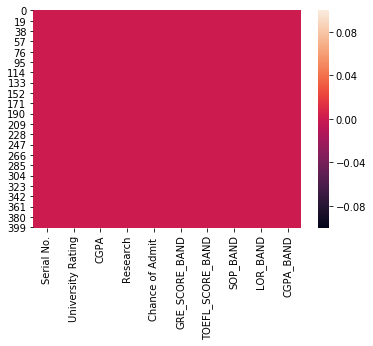

In [132]:
sns.heatmap(dframe.isnull())

In [133]:
dframe.head()

,Serial No.,University Rating,CGPA,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND,LOR_BAND,CGPA_BAND
0,1,4,9.65,1,0.92,5,5,8,8,7
1,2,4,8.87,1,0.76,4,3,7,8,5
2,3,3,8.00,1,0.72,3,3,5,6,4
3,4,3,8.67,1,0.80,4,4,6,4,5
4,5,2,8.21,0,0.65,3,2,3,5,4


In [134]:
dframe.drop('CGPA',axis=1,inplace=True)

In [135]:
dframe.head()

,Serial No.,University Rating,Research,Chance of Admit,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND,LOR_BAND,CGPA_BAND
0,1,4,1,0.92,5,5,8,8,7
1,2,4,1,0.76,4,3,7,8,5
2,3,3,1,0.72,3,3,5,6,4
3,4,3,1,0.80,4,4,6,4,5
4,5,2,0,0.65,3,2,3,5,4


In [136]:
y2 = dframe['Chance of Admit ']

In [137]:
X2 = dframe.drop('Chance of Admit ',axis=1)

In [138]:
X2.head()

,Serial No.,University Rating,Research,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND,LOR_BAND,CGPA_BAND
0,1,4,1,5,5,8,8,7
1,2,4,1,4,3,7,8,5
2,3,3,1,3,3,5,6,4
3,4,3,1,4,4,6,4,5
4,5,2,0,3,2,3,5,4


In [140]:
X2.drop('Serial No.',axis=1,inplace=True)

In [141]:
X2.head()

,University Rating,Research,GRE_SCORE_BAND,TOEFL_SCORE_BAND,SOP_BAND,LOR_BAND,CGPA_BAND
0,4,1,5,5,8,8,7
1,4,1,4,3,7,8,5
2,3,1,3,3,5,6,4
3,3,1,4,4,6,4,5
4,2,0,3,2,3,5,4


In [142]:
y2.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [145]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
lr2 = LinearRegression()

In [148]:
lr2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
pred2 = lr2.predict(X2_test)

In [150]:
from sklearn.metrics import r2_score

In [151]:
r2_score(y2_test,pred2)

0.8101559739261428

In [152]:
print(lr2.predict(X2_test.iloc[[1],:]))
print(y2_test.iloc[1])

[0.72815688]
0.68
